1. Data Cleaning & Exploration

 - Loading the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Chocolate Sales.csv')
df

- Checking basic information

In [ ]:
# Number of rows and columns
df.shape

In [ ]:
# Data types and missing values
df.info()

- Preview the data

In [ ]:
# First 5 rows
df.head()

In [45]:
# Last 5 rows
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,$574,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,2022-05-23,"$5,075",344


In [ ]:
# Remove $ sign
#df['Amount'] = df['Amount'].replace({'\$': ''}, regex=True)

# Remove , sign and convert to float
df['Amount'] = df['Amount'].replace({',': ''}, regex=True).astype(float)
df

In [ ]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

2.  Descriptive Statistics

In [ ]:
#What is the total sales amount?
total_sales = df['Amount'].sum()
print(f"Total sales amount: {total_sales}")


In [148]:
#What is the average amount per sale?
average_sale = df['Amount'].mean()
print(f"Average amount per sale: {average_sale}")

Average amount per sale: 5652.308043875685


In [67]:
#What is the total number of boxes shipped?
total_boxes = df['Boxes Shipped'].sum()
print(f'Total number of boxes shipped: {total_boxes}')

Total number of boxes shipped: 177007


In [68]:
#How many unique salespeople are there?
unique_salespeople = df['Sales Person'].nunique()
print(f'Unique Sales People: {unique_salespeople}')

Unique Sales People: 25


GROUPING AND AGGREGATION

In [ ]:
#Total sales by country
sales_by_country = df.groupby('Country')['Amount'].sum()
sales_by_country

In [ ]:
#Total sales by product
sales_by_product = df.groupby('Product')['Amount'].sum()
sales_by_product

In [ ]:
#Which salesperson made the most sales (by amount)?
top_salesperson = df.groupby('Sales Person')['Amount'].sum().idxmax()
print(f"Salesperson with the most sales: {top_salesperson}")

In [145]:
# Group sales by salesperson and sum the sales amount
sales_by_salesperson = df.groupby('Sales Person')['Amount'].sum()

# Find the salesperson with the least sales
least_salesperson = sales_by_salesperson.idxmin()  # Name of the salesperson with the least sales
least_sales_amount = sales_by_salesperson.min()    # Sales amount of the least performing salesperson

# Display the result
print(f"The salesperson with the least sales is {least_salesperson} with a total of ${least_sales_amount:.2f}")


The salesperson with the least sales is Wilone O'Kielt with a total of $138523.00


In [ ]:
#Total boxes shipped by each salesperson
boxes_by_salesperson = df.groupby('Sales Person')['Boxes Shipped'].sum()
boxes_by_salesperson


In [146]:
#Monthly total sales

df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
print(monthly_sales)

Month
2022-01    896105.0
2022-02    699377.0
2022-03    749483.0
2022-04    674051.0
2022-05    752892.0
2022-06    865144.0
2022-07    803425.0
2022-08    743148.0
Freq: M, Name: Amount, dtype: float64


FILTERING AND SORTING

In [ ]:
#Find all sales made in a specific country, e.g., 'USA

sales_usa = df[df['Country'] == 'USA']
sales_usa

In [134]:
Total_usa_sales = df[df['Country'] == 'New Zealand'][['Amount', 'Boxes Shipped']].sum()
print("Total sales in the USA:")
print(Total_usa_sales)


Total sales in the USA:
Amount           950418.0
Boxes Shipped     26580.0
dtype: float64


In [136]:
Total_usa_sales = df[df['Country'] == 'Canada'][['Amount', 'Boxes Shipped']].sum()
print("Total sales in the USA:")
print(Total_usa_sales)

Total sales in the USA:
Amount           962899.0
Boxes Shipped     31221.0
dtype: float64


In [ ]:
#Find all sales of Peanut Butter Cubes
PeanutButterCubes = df[df['Product'] == 'Peanut Butter Cubes']
PeanutButterCubes

In [ ]:
#Find the top 5 highest value sales
top_5_sales = df.nlargest(5, 'Amount')
top_5_sales

In [ ]:
#Find sales where more than 100 boxes were shipped
large_shipment_sales = df[df['Boxes Shipped'] > 100]
large_shipment_sales

VISUALIZATION

In [ ]:
pip install matplotlib

In [95]:
import matplotlib.pyplot as plt

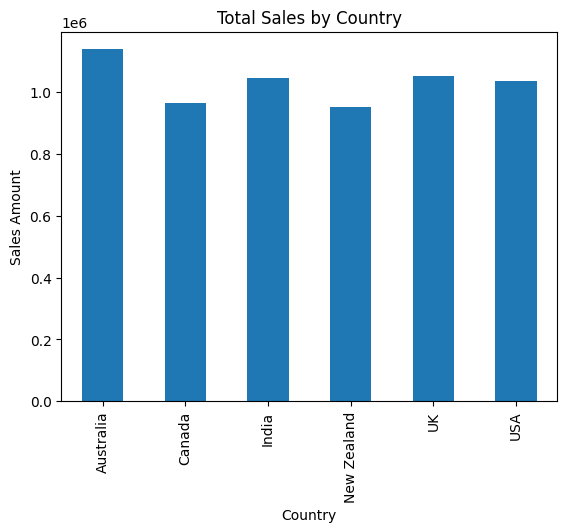

In [125]:
#Bar chart of total sales by country

sales_by_country = df.groupby('Country')['Amount'].sum()
sales_by_country.plot(kind='bar')
plt.title('Total Sales by Country')
plt.ylabel('Sales Amount')
plt.show()


In [ ]:
#Line chart of monthly sales trends

monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.ylabel('Sales Amount')
plt.show()


In [ ]:
#Histogram of sale amounts

df['Amount'].plot(kind='hist', bins=20)
plt.title('Distribution of Sale Amounts')
plt.xlabel('Amount')
plt.show()


In [102]:
#pip install seaborn
import seaborn as sns

In [ ]:
#Box plot of amount by product

sns.boxplot(x='Product', y='Amount', data=df)
plt.title('Sale Amount by Product')
plt.show()


GENERATE INSIGHTS

In [124]:
#Which countries have the highest sales?

top_countries = sales_by_country.sort_values(ascending=False)
print("Top countries by sales:")
top_countries

Top countries by sales:


Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

In [137]:
#Which products have the highest sales?

top_products = sales_by_product.sort_values(ascending=False)
print("Top products by sales:")
print(top_products)

Top products by sales:
Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64


In [142]:
#Which salesperson made the most sales?

# Sales by salesperson
sales_by_salesperson = df.groupby('Sales Person')['Amount'].sum()

# Identifying the top salesperson
top_salesperson = sales_by_salesperson.idxmax()
top_salesperson_sales = sales_by_salesperson.max()

print(f"The top salesperson is {top_salesperson} with a total of ${top_salesperson_sales:.2f}")

The top salesperson is Ches Bonnell with a total of $320901.00


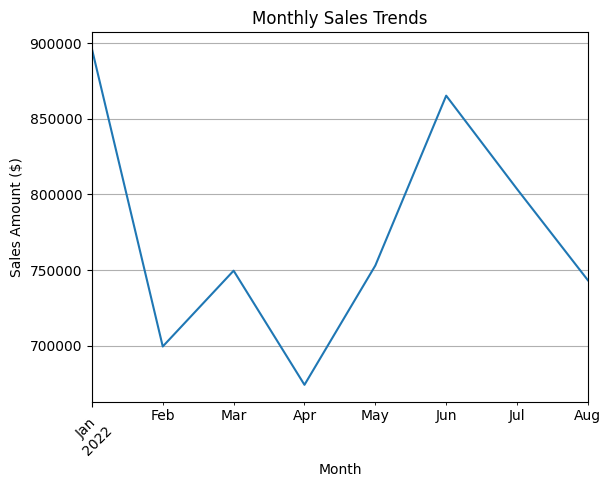

Total sales by month:
Month
2022-01    896105.0
2022-02    699377.0
2022-03    749483.0
2022-04    674051.0
2022-05    752892.0
2022-06    865144.0
2022-07    803425.0
2022-08    743148.0
Freq: M, Name: Amount, dtype: float64


In [123]:
#Monthly sales trend analysis

# Monthly sales trend (visualize)
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.ylabel('Sales Amount ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print total sales by month
print("Total sales by month:")
print(monthly_sales)


In [122]:
#Which products are the most profitable per unit sold?

# Average sales per product
avg_sales_per_product = df.groupby('Product')['Amount'].mean()

# Sort products by average sales
sorted_avg_sales = avg_sales_per_product.sort_values(ascending=False)
print("Average sales per product:")
print(sorted_avg_sales)


Average sales per product:
Product
Peanut Butter Cubes     6629.428571
Mint Chip Choco         6310.422222
Choco Coated Almonds    6191.948718
Manuka Honey Choco      6123.133333
99% Dark & Pure         6118.285714
Baker's Choco Chips     6088.121951
85% Dark Bars           5984.580000
Smooth Sliky Salty      5926.983051
Almond Choco            5782.000000
50% Dark Bites          5695.200000
White Choc              5674.948276
Organic Choco Syrup     5667.307692
Raspberry Choco         5515.416667
Milk Bars               5494.857143
Orange Choco            5449.872340
Spicy Special Slims     5434.333333
Caramel Stuffed Bars    5385.767442
After Nines             5226.620000
Eclairs                 5207.416667
Fruit & Nut Bars        5182.940000
70% Dark Bites          5038.333333
Drinking Coco           4583.125000
Name: Amount, dtype: float64


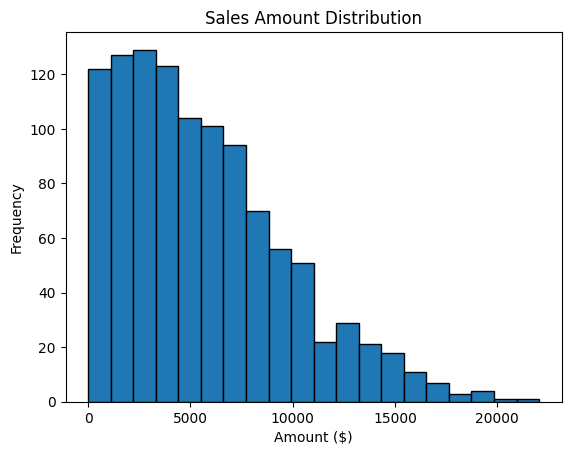

In [149]:
#Sales distribution

# Histogram of sales amounts
df['Amount'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Sales Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()


In [66]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384
